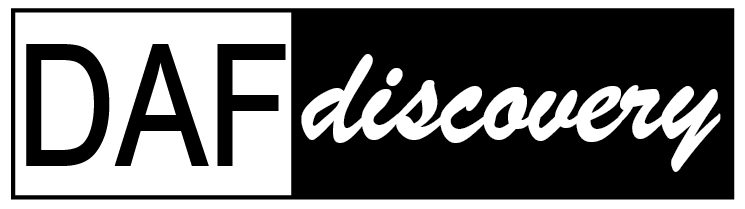

# Data Fusion Discovery Pipeline (DAF*discovery*)


This is the Jupyter Notebook related to [Paper on: LAABio](https://laabioippn.wordpress.com/) for more information

This is a pipeline to merge __previously processed__ data from different (spectral) techniques. 

- Projects might be orgaized into different folders
- Data must be accompanied to a __Metdata__ with a common ID header to index different data from the same sample.

Example: 

Metadata with at least: (1) sample name; (2) NMR code per sample; __Optional:__ (3) MS code per sample; (4) Grouping information; (5) Sample Comment 

processed NMR data (e.g. MNova, TopSpin) and peak intensities/areas exported to a .CSV file 

processed MS data (feature list; e.g. MZmine, MSDial) and peak intensities/areas exported to a .CSV file 

> There are some possibilities to explore: (1) NMR only; (2) NMR + MS; (3) NMR + Bioactivity/Phenotipic data; (4) MS + Bioactivity/Phenotipic data; (5) NMR + MS + Bioactivity/Phenotipic data

> 1. When there is only NMR data, the STOCSY calculation should be done as it is.


> 2. When there are NMR and MS data, and the "STOCSY driver" is chosen from the MS data (a specific feature number), the correlation in the direction of NMR results in a highligthed NMR spectra.

> 3. When there are NMR and MS data, and the "STOCSY driver" is chosen from the NMR data (a specific chemical shift/peak), the correlation in the direction of MS results in a .CSV table with MS feature number + indexed correlation results.

> 4. When there are Bioactivity/Phenotipic data, the "STOCSY driver" should always be chosen from this Bioactivity/Phenotipic data and the correlation in the direction of NMR results in a highligthed NMR spectra and/or the correlation in the direction of MS results in a .CSV table with MS feature number + indexed correlation results.


Note that the output from (1) NMR data is a color coded spectra modulated by Covariance and Correlations, and (2) MS data is a matrix (2 x X samples) indexed by MS feature list and the correlation results so we can add it into Cytoscape to color code MSMS base Molecular Networks.
#### Option 1: NMR + MS + Bioact
#### Option 2: NMR + MS
#### Option 3: NMR + Bioact
#### Option 4: MS + Bioact
#### Option 5: NMR only


In [1]:
# Dependencies to install and import
import numpy as np
import pandas as pd
import warnings
import matplotlib as plt
import matplotlib.pyplot as pltpy
plt.rcParams['pdf.fonttype'] = 42 #set up for Acrobat Illustrator
plt.rcParams['ps.fonttype'] = 42  #set up for Acrobat Illustrator
import os
import os.path

# Import

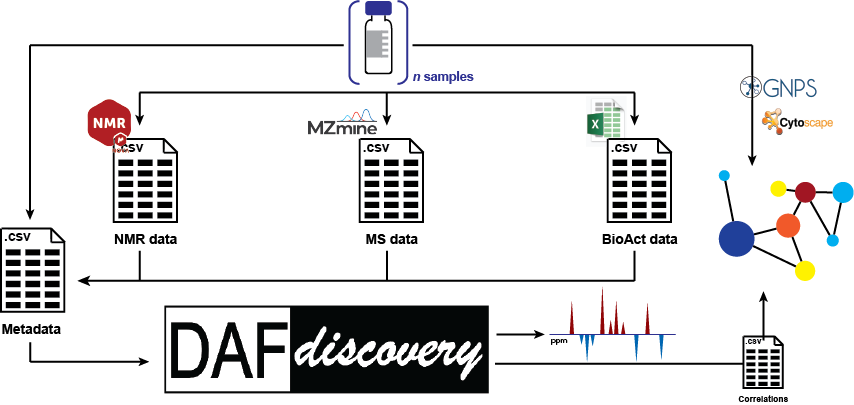


Import each data already processes. __DAF*discovery*__ does not preprocess data; we assume this part is covered (add REF)

__Metadata__ (as .csv) should have 'Samples', 'NMR_filename', 'MS_filename' and/or 'BioAct_filename' as headers

This section will get filenames from the __Metadata__ to reorder the actual data exported from the previous processing steps


## <span style='color:Red'> This part might need refinement .  </span>
## <span style='color:Red'> I wish I could jump set up a function for the selection of the options.  </span>



In [2]:
# Set Project and Project path inside your main folder
Project = 'Project_EssentialOils';

os.chdir(Project) # go to the Project folder


In [3]:
# Import Metadata to set the option
Metadata = pd.read_csv("Metadata.csv", sep=',',header=0)

# Set order from Metadata
if ('NMR_filename') in Metadata.columns and ('MS_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist() 
    Ordered_MS_filename = Metadata['MS_filename'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: NMR + MS + BioAct. Go for Option 1')
    data_inuse = ['NMR', 'MS', 'BioAct']
    
elif ('NMR_filename') in Metadata.columns and ('MS_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_MS_filename = Metadata['MS_filename'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()  
    print('You are about to merge data from: NMR + MS. Go for Option 2')
    data_inuse = ['NMR', 'MS']
    
elif ('NMR_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: NMR + BioAct. Go for Option 3')
    data_inuse = ['NMR', 'BioAct']

elif ('MS_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_MS_filename = Metadata['MS_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: MS + BioAct. Go for Option 4')
    data_inuse = ['MS', 'BioAct'] 
    
elif ('NMR_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_NMR_filename = Metadata['NMR_filename'].values.tolist()    
    print('You are about to work with NMR data alone. Have a look in what more you could do with additional data. . Go for Option 5')
    data_inuse = ['NMR']

    
else: print('Error (sorry!), please check your Metadata')

print(f'Data in Use: {data_inuse}')


You are about to merge data from: NMR + MS. Go for Option 2
Data in Use: ['NMR', 'MS']


___
___
## Option 2: NMR + MS

__Use this cell to work with 'NMR' + 'MS'__

The first step is to import the .csv file from the __NMR processed data__ and from the __MS processed data__

In [4]:
if data_inuse == ['NMR', 'MS']:
    # NMR
    NMR = pd.read_csv('C13.csv', sep=',',header=0)
    ppm = NMR["Unnamed: 0"]

    # MS
    MS = pd.read_csv('MS.csv', sep=',',header=0)
    MSdata = MS.drop(["row ID", "row m/z", "row retention time"], axis=1)
    MSinfo = MS[["row ID", "row m/z", "row retention time"]]
    
else: print('Try the next one')

# REORDERING data according to the Metadata (Ordered_Samples)

NMR = NMR[Ordered_NMR_filename] # reorder columns according to the sampleIDs
NMR.rename(columns={i:j for i,j in zip(Ordered_NMR_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

MSdata = MSdata[Ordered_MS_filename] # reorder columns according to the sampleIDs
MSdata.rename(columns={i:j for i,j in zip(Ordered_MS_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs


# MERGE - Data from different sources has to be merged to creat a single data vector for ...
#each sample. This is the data fusion side of it.
MergeDF = pd.concat([NMR,MSdata/100000000],ignore_index=True)

# Save outside (CSV)
MergeDF = pd.DataFrame(MergeDF)
if not os.path.exists('data'):
    os.mkdir('data')
MergeDF.to_csv("data/MergeDF_NMR_MS.csv", sep=',',index=False)

# expand the axis to cover both NMR and MS
gap = ppm.values[-1] - ppm.values[-2]
start = ppm.values[-1] + gap
end = start + (len(MSdata) * gap)
axis2 = pd.DataFrame([np.arange(start, end, gap)])
new_axis = pd.concat([ppm,axis2.T], ignore_index=True)

print('Data from both NMR and MS are now MERGED and reordered according to the Matadata. We save it as a .CSV file for you')


Data from both NMR and MS are now MERGED and reordered according to the Matadata. We save it as a .CSV file for you


### STOCSY calculations

Use this cell to apply STOCSY on a given driver peak.

The driver peak should be infromed by the user __in line 5__.

<IPython.core.display.Javascript object>


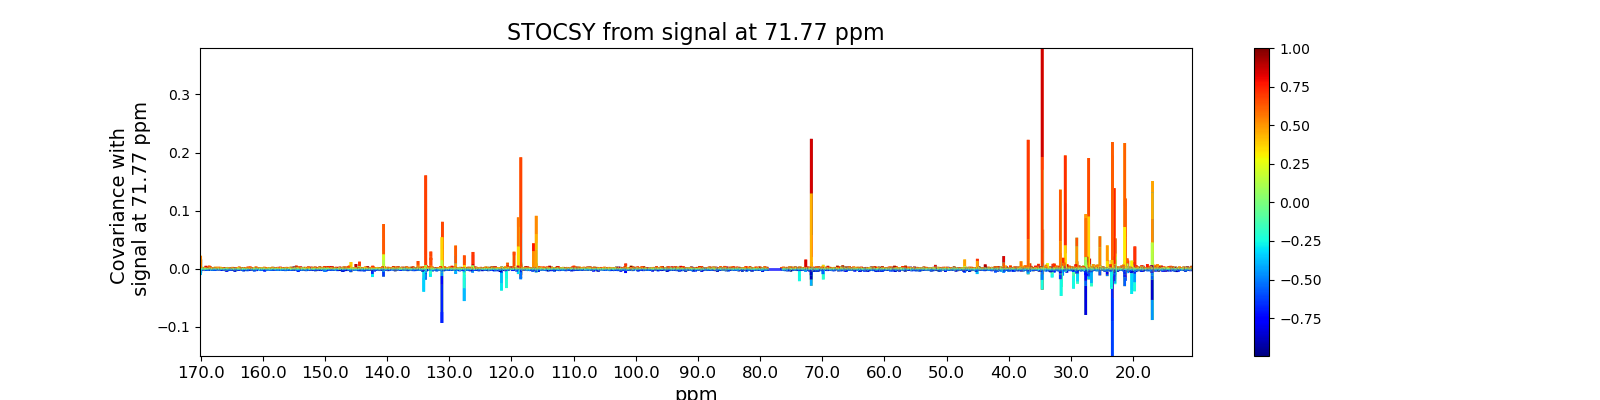

In [7]:
# Chose driver from NMR peaks to produce a .CSV file of MS features and correlation values with the NMR peak driver. 
from STOCSY import *
%matplotlib notebook

driver = 71.77

corr, covar = STOCSY(driver,MergeDF,new_axis[0])

corrDF = pd.DataFrame(corr)
corrDF.columns = [f'corr_{driver}']
#corrDF.rename(columns={0:f'corr_{driver}'}, inplace=True) # this still includes all rows from the merged data
corrDF2 = corrDF.iloc[-(len(MSinfo)):].reset_index()  # this gets only those of the concatonated data

covarDF = pd.DataFrame(covar)
covarDF.columns = [f'covar_{driver}']
#covarDF.rename(columns={16160:f'covar_{driver}'}, inplace=True) # this still includes all rows from the merged data
covarDF2 = covarDF.iloc[-(len(MSinfo)):].reset_index()  # this gets only those of the concatonated data


# Save and export the .csv file with the correlation values mapped onto the MS feature list
MSinfo_corr = pd.merge(MSinfo, corrDF2, left_index=True, right_index=True)
MSinfo_corr_covar = pd.merge(MSinfo_corr, covarDF2, left_index=True, right_index=True)

if not os.path.exists('data'):
    os.mkdir('data')
    
#This .CSV file can be imported as Node Attributes for [FBMN](https://www.nature.com/articles/s41592-020-0933-6).
MSinfo_corr.to_csv(f'data/MSinfo_corr_{driver}.csv', sep=',',index=False)
#MSinfo_corr

### The .csv file produced with the correlation data can be imported as Node Attributes for [FBMN](https://www.nature.com/articles/s41592-020-0933-6).
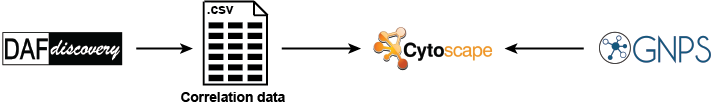

#### Use this cell to plot the MS features (Retention Time vs m/z) according with the STOCSY results from the chosen driver..

The driver peak should be infromed by the user __in line 5__.

In [8]:
# Plot MS features according to their Retention Time and correlation with the chosen driver

import plotly.express as px
corr_plotMS = px.scatter(MSinfo_corr, MSinfo_corr['row retention time'], MSinfo_corr['row m/z'],
                        color='corr_71.77', hover_data=(['row ID', 'corr_71.77']),
                        color_continuous_scale=px.colors.sequential.Jet,
                        size=(MSinfo_corr['corr_71.77']**2), opacity=0.6,
                        title='Correlation plot of MS features'
                        )

corr_plotMS.update_layout(font_color="black",
                         title_font_color="black",
                         font=dict(size=16))

corr_plotMS.show()

if not os.path.exists('images'):
    os.mkdir('images')
corr_plotMS.write_image(f"images/MSplot_corr_{driver}ppm.pdf")


#### Use this cell to apply STOCSY on a given driver from the __MS feature list__.

The driver peak should be infromed by the user __in line 5__.

In [ ]:
# Chose driver from MS features to produce highlighted NMR spectra showing highly correlated peaks
from STOCSY import *
%matplotlib notebook

driver_sel = 1  # Select with MS feature will be used as driver

driverMS = ppm.values[-1] + (gap*driver_sel)

corr, covar = STOCSY(float(driverMS),MergeDF,new_axis[0])
corrDF = pd.DataFrame(corr)
corrDF.rename(columns={0:f'corr_MSf{driver_sel}'}, inplace=True)

# Save and export the .csv file with the correlation values mapped onto the MS feature list
MSinfo_corr = pd.merge(MSinfo, corrDF, left_index=True, right_index=True)

if not os.path.exists('data'):
    os.mkdir('data')
#This .CSV file can be imported as Node Attributes for [FBMN](https://www.nature.com/articles/s41592-020-0933-6).
MSinfo_corr.to_csv(f'data/MSinfo_corr-fromMS_{driver_sel}.csv', sep=',',index=False)


___
___
## Option 3: NMR + BioActivity



__Use this cell to work with 'NMR' + 'BioAct'__

In [ ]:
if data_inuse == ['NMR', 'BioAct']:
    # NMR
    NMR = pd.read_csv('C13.csv', sep=',',header=0)
    ppm = NMR["Unnamed: 0"]
    
    # Bioact
    BioAct = pd.read_csv('Bioact.csv', sep=',',header=0)
    BioActdata = BioAct.iloc[:,1]
else: print('This is not the cell/option for you. Please, try the next one')
    
# REORDERING data according to the Metadata (Ordered_Samples)
NMR = NMR[Ordered_NMR_filename] # reorder columns according to the sampleIDs
NMR.rename(columns={i:j for i,j in zip(Ordered_NMR_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

BioActdata = BioActdata[Ordered_BioAct_filename] # reorder columns according to the sampleIDs
BioActdata.rename(columns={i:j for i,j in zip(Ordered_BioAct_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

# MERGE - Data from different sources has to be merged to creat a single data vector for ...
#each sample. This is the data fusion side of it.
MergeDF = pd.concat([NMR,BioActdata],ignore_index=True)

# Save outside (CSV)
MergeDF = pd.DataFrame(MergeDF)
if not os.path.exists('data'):
    os.mkdir('data')
MergeDF.to_csv("data/MergeDF_NMR_MS_BioAct.csv", sep=',',index=False)

# expand the axis to cover both NMR and MS
gap = ppm.values[-1] - ppm.values[-2]
start = ppm.values[-1] + gap
end = start + (gap)    # considering 1 column for BioActivity
axis2 = pd.DataFrame([np.arange(start, end, gap)])
new_axis = pd.concat([ppm,axis2.T], ignore_index=True)
#new_axis = new_axis[0]

print('Data from both NMR and MS and BioActivity are now MERGED and reordered according to the Matadata. We save it as a .CSV file for you')

In [ ]:
print(NMR.shape)
print(MergeDF.shape)
print(new_axis.shape)

### STOCSY calculations

Use this cell to apply STOCSY on a given driver peak.

The driver peak should be infromed by the user __in line 5__.

In [ ]:
# Chose driver from the Bioactivity values
from STOCSY_RMB import *
%matplotlib notebook

driverBioAct = new_axis.values[-1]

corr, covar = STOCSY_RMB(float(driverBioAct),MergeDF,new_axis[0])

___
___
## Option 4: MS + Bioact
__Use this cell to work with 'MS' + 'BioAct'__

In [ ]:
if data_inuse == ['MS', 'BioAct']:
    # MS
    MS = pd.read_csv('essentialOilsGCMS_C.csv', sep=',',header=0)
    MSdata = MS.drop(["row ID", "row m/z", "row retention time"], axis=1)
    MSinfo = MS[["row ID", "row m/z", "row retention time"]]

    # Bioact
    BioAct = pd.read_csv('Bioact.csv', sep=',',header=0)
    BioActdata = pd.DataFrame(BioAct.iloc[:,1:])
else: print('This is not the cell/option for you. Please, try the next one')
    
# REORDERING data according to the Metadata (Ordered_Samples)
MSdata = MSdata[Ordered_MS_filename] # reorder columns according to the sampleIDs
MSdata.rename(columns={i:j for i,j in zip(Ordered_MS_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

BioActdata = BioActdata[Ordered_BioAct_filename] # reorder columns according to the sampleIDs
BioActdata.rename(columns={i:j for i,j in zip(Ordered_BioAct_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

# MERGE - Data from different sources has to be merged to creat a single data vector for ...
#each sample. This is the data fusion side of it.
MergeDF = pd.concat([MSdata,BioActdata],ignore_index=True)

# Save outside (CSV)
MergeDF = pd.DataFrame(MergeDF)
if not os.path.exists('data'):
    os.mkdir('data')
MergeDF.to_csv("data/MergeDF_MS_BioAct.csv", sep=',',index=False)

# expand the axis to cover both NMR and MS
new_axis = pd.DataFrame(np.arange(0,(len(MSdata)+1)))

print('Data from both MS and BioActivity are now MERGED and reordered according to the Matadata. We save it as a .CSV file for you')

### STOCSY calculations

Use this cell to apply STOCSY on a given driver peak.

The driver peak should be infromed by the user __in line 5__.

In [ ]:
# Chose driver from the Bioactivity values
from STOCSY_RMB import *
%matplotlib notebook

driverBioAct = new_axis.values[-1]

corr, covar = STOCSY_RMB(float(driverBioAct),MergeDF,new_axis[0])
corrDF = pd.DataFrame(corr)
corrDF.rename(columns={int(driverBioAct):'corr_BioAct'}, inplace=True) # needs to correct the Header
corrDF2 = corrDF.iloc[:-1].reset_index()  # this gets only those of the concatonated data

# Save and export the .csv file with the correlation values mapped onto the MS feature list
MSinfo_corr = pd.merge(MSinfo, corrDF2, left_index=True, right_index=True)

if not os.path.exists('data'):
    os.mkdir('data')
#This .CSV file can be imported as Node Attributes for [FBMN](https://www.nature.com/articles/s41592-020-0933-6).
MSinfo_corr.to_csv(f'data/MSinfo_corr_fromBioAct.csv', sep=',',index=False) #{driverBioAct}


In [ ]:
# Plot MS features according to their Retention Time and correlation with the chosen driver
import plotly.express as px

corr_plotMS = px.scatter(MSinfo_corr, MSinfo_corr['row retention time'], MSinfo_corr['row m/z'],
                        color='corr_BioAct', hover_data=(['row ID', 'corr_BioAct']),
                        color_continuous_scale=px.colors.sequential.Jet,
                        size=(MSinfo_corr['corr_BioAct']**2), opacity=0.6,
                        title='Correlation plot of MS features'
                        )

corr_plotMS.show()

if not os.path.exists('images'):
    os.mkdir('images')
corr_plotMS.write_image(f"images/MSplot_corr.pdf")


### The .csv file produced with the correlation data can be imported as Node Attributes for [FBMN](https://www.nature.com/articles/s41592-020-0933-6).
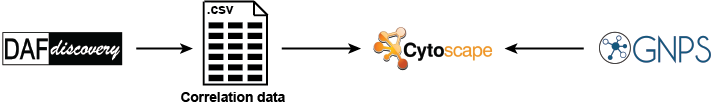

___
___
## Option 5: NMR only

__Use this cell to work 'NMR' data only__. Check [Paper on: Data Integration ADDref](https://pubs.rsc.org/en/content/articlelanding/2019/fd/c8fd00227d) for more information

In [ ]:
if data_inuse == ['NMR']:
    # NMR
    NMR = pd.read_csv('C13.csv', sep=',',header=0)
    ppm = NMR["Unnamed: 0"]
    
else: print('Try the next one')

# REORDERING data according to the Metadata (Ordered_Samples)

NMR = NMR[Ordered_NMR_filename] # reorder columns according to the sampleIDs
NMR.rename(columns={i:j for i,j in zip(Ordered_NMR_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

print('Data from NMR is reordered according to the Matadata.')

### STOCSY calculations

Use this cell to apply STOCSY on a given driver peak.

The driver peak should be infromed by the user __in line 5__.

In [ ]:
# Chose driver to produce highlighted NMR spectra showing highly correlated peaks
from STOCSY_RMB import *
%matplotlib notebook

driver = 71.7767
corr, covar = STOCSY_RMB(driver,NMR,ppm)

## Miscellaneous

 Other Multivariate analysis stuff ... PCA, PLS-DA, O-PLS-DA, HCA, HeatMap, etc...

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

features = Ordered_Samples         # Separating out the features
y = features  # Separating out the target
#x = MSdata   # get data from the MS data DataFrame
#x = NMR      # get data from the NMR data DataFrame
x = MergeDF   # get data from the merged DataFrame

x_norm = (x-x.mean())/x.std()

print(NMR.shape)
print(MSdata.shape)
print(MergeDF.shape)

x = StandardScaler().fit_transform(x_norm.T)

# Set classification for hue
hue_v = ['MR','MA','MR','MA','MA','MA','MR','MR']

pca = PCA(n_components=5).fit(x)

transformed = pca.transform(x)

fig = plt.figure(figsize=(5,5))
ax=sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=hue_v);
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 components PCA', fontsize = 12)

if not os.path.exists("images"):
    os.mkdir("images")
fig.savefig("images/pca.pdf")

### REFERENCES

Cloarec O et. al. Statistical total correlation spectroscopy: an exploratory approach for latent biomarker identification from metabolic 1H NMR data sets. Analytical Chemistry. 2005. [link](https://pubmed.ncbi.nlm.nih.gov/15732908/)

Crockford DJ et. al. Statistical Heterospectroscopy, an Approach to the Integrated Analysis of NMR and UPLC-MS Data Sets:  Application in Metabonomic Toxicology Studies. 2006. [link](https://pubs.acs.org/doi/10.1021/ac051444m)

Borges RM et al. Exploring correlations between MS and NMR for compound identification using essential oils: A pilot study. Phytochemical Analysis. 2022. [link](https://pubmed.ncbi.nlm.nih.gov/35098600/)

Kuhn S. An integrated approach for mixture analysis using MS and NMR techniques. 2019. [link](https://pubs.rsc.org/en/content/articlelanding/2019/fd/c8fd00227d)